## Classification task

Build a classifier that classifies the “TARGET” attribute. 

The classification goal is to predict whether a client has loan repayment difficulties or not (target attribute: “TARGET“ {(binary: 0, 1), 1--> client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample and 0--> all other cases}. 

You can do various data pre-processing and transformations (e.g. grouping values of attributes, converting them to binary, etc.), providing explanations for why you have chosen to do that. 

You may need to split the provided training set further into training, validation and/or test sets to accurately set the parameters and evaluate the quality of the classifier.
You can use KNIME to build classifiers, or feel free to use Python scikit-learn or other packages. 

If you do this, though, please explain more about your classifier - and be sure that you are producing valid results! 

You don't need to limit yourself to the classifiers we used in class, but if you do use other classifiers you need to describe them in your report and make sure you are producing valid results. 

At the very minimum, you need to produce a classifier for each method we have covered.

A hint: Usually it's not a case of having a 'better' classifier that will produce good results. Rather, it's a case of identifying or generating good features that can be used to solve the problem.

•	You need to build classifiers using the techniques covered in the lectures to predict the class attribute. 
•	At the very minimum, you need to produce a classifier for each method we have covered. 
•	However, if you explore the problem very thoroughly (as you should do in Industry), preprocessing the data, looking at different methods, choosing their best parameters settings, and identifying the best classifier in a principled and explainable way, then you should be able to get a better mark. 
•	If you show 'expert' use either KNIME or Python (i.e. exploring multiple classifiers, with different settings, choosing the best in a principled way, and being able to explain why you built the model the way you did), this will attract a better mark.


# 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:

# set output display options to show all columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [3]:
# Explore the training dataset

loan_data_training = pd.read_csv('loan_data_training.csv')

In [4]:
# shape of the dataset

loan_data_training.shape

(42452, 72)

In [5]:
loan_data_training.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
3,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,-1038,1,1,0,1,0,0,1.0,2,2,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.432340,0.077499,0.0,0.0,0.0,0.0,-591,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [6]:
loan_data_training.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [7]:
loan_data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42452 entries, 0 to 42451
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   42452 non-null  int64  
 1   TARGET                       42452 non-null  int64  
 2   NAME_CONTRACT_TYPE           42452 non-null  object 
 3   CODE_GENDER                  42452 non-null  object 
 4   FLAG_OWN_CAR                 42452 non-null  object 
 5   FLAG_OWN_REALTY              42452 non-null  object 
 6   CNT_CHILDREN                 42452 non-null  int64  
 7   AMT_INCOME_TOTAL             42452 non-null  float64
 8   AMT_CREDIT                   42452 non-null  float64
 9   AMT_ANNUITY                  42451 non-null  float64
 10  AMT_GOODS_PRICE              42404 non-null  float64
 11  NAME_TYPE_SUITE              42293 non-null  object 
 12  NAME_INCOME_TYPE             42452 non-null  object 
 13  NAME_EDUCATION_T

In [8]:
loan_data_training.dtypes.value_counts()


int64      42
float64    19
object     11
Name: count, dtype: int64

In [9]:
# check for unique values in each attribute show as dataframe

loan_data_training.nunique().to_frame()



,0
SK_ID_CURR,42452
TARGET,2
NAME_CONTRACT_TYPE,2
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
CNT_CHILDREN,10
AMT_INCOME_TOTAL,628
AMT_CREDIT,3137
AMT_ANNUITY,8121


In [10]:
# show data for categorical attributes with unique value counts

loan_data_training.select_dtypes('object').nunique().to_frame()

,0
NAME_CONTRACT_TYPE,2
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,7
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
WEEKDAY_APPR_PROCESS_START,7


In [11]:
loan_data_training[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,Cash loans,M,N,Y
1,Cash loans,F,N,Y
2,Cash loans,M,N,Y
3,Cash loans,F,N,N
4,Cash loans,M,Y,Y


In [12]:
# check for duplicates

loan_data_training.duplicated().sum()


0

In [13]:
# check for missing values rows

# loan_data_training.isnull().sum()

# show attributes with the missing values count greater than 0

loan_data_training.isnull().sum()[loan_data_training.isnull().sum() > 0].sort_values(ascending=False).to_frame()

,0
EXT_SOURCE_3,8966
AMT_REQ_CREDIT_BUREAU_HOUR,6431
AMT_REQ_CREDIT_BUREAU_DAY,6431
AMT_REQ_CREDIT_BUREAU_WEEK,6431
AMT_REQ_CREDIT_BUREAU_MON,6431
AMT_REQ_CREDIT_BUREAU_QRT,6431
AMT_REQ_CREDIT_BUREAU_YEAR,6431
NAME_TYPE_SUITE,159
OBS_30_CNT_SOCIAL_CIRCLE,105
DEF_30_CNT_SOCIAL_CIRCLE,105


In [14]:
# check for outliers for all numerical and categorical attributes


stats = loan_data_training.describe()

# loan_data_training.describe()

# export to csv stats

stats.to_csv('stats.csv')




array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>],
       [<Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>],
       [<Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'ce

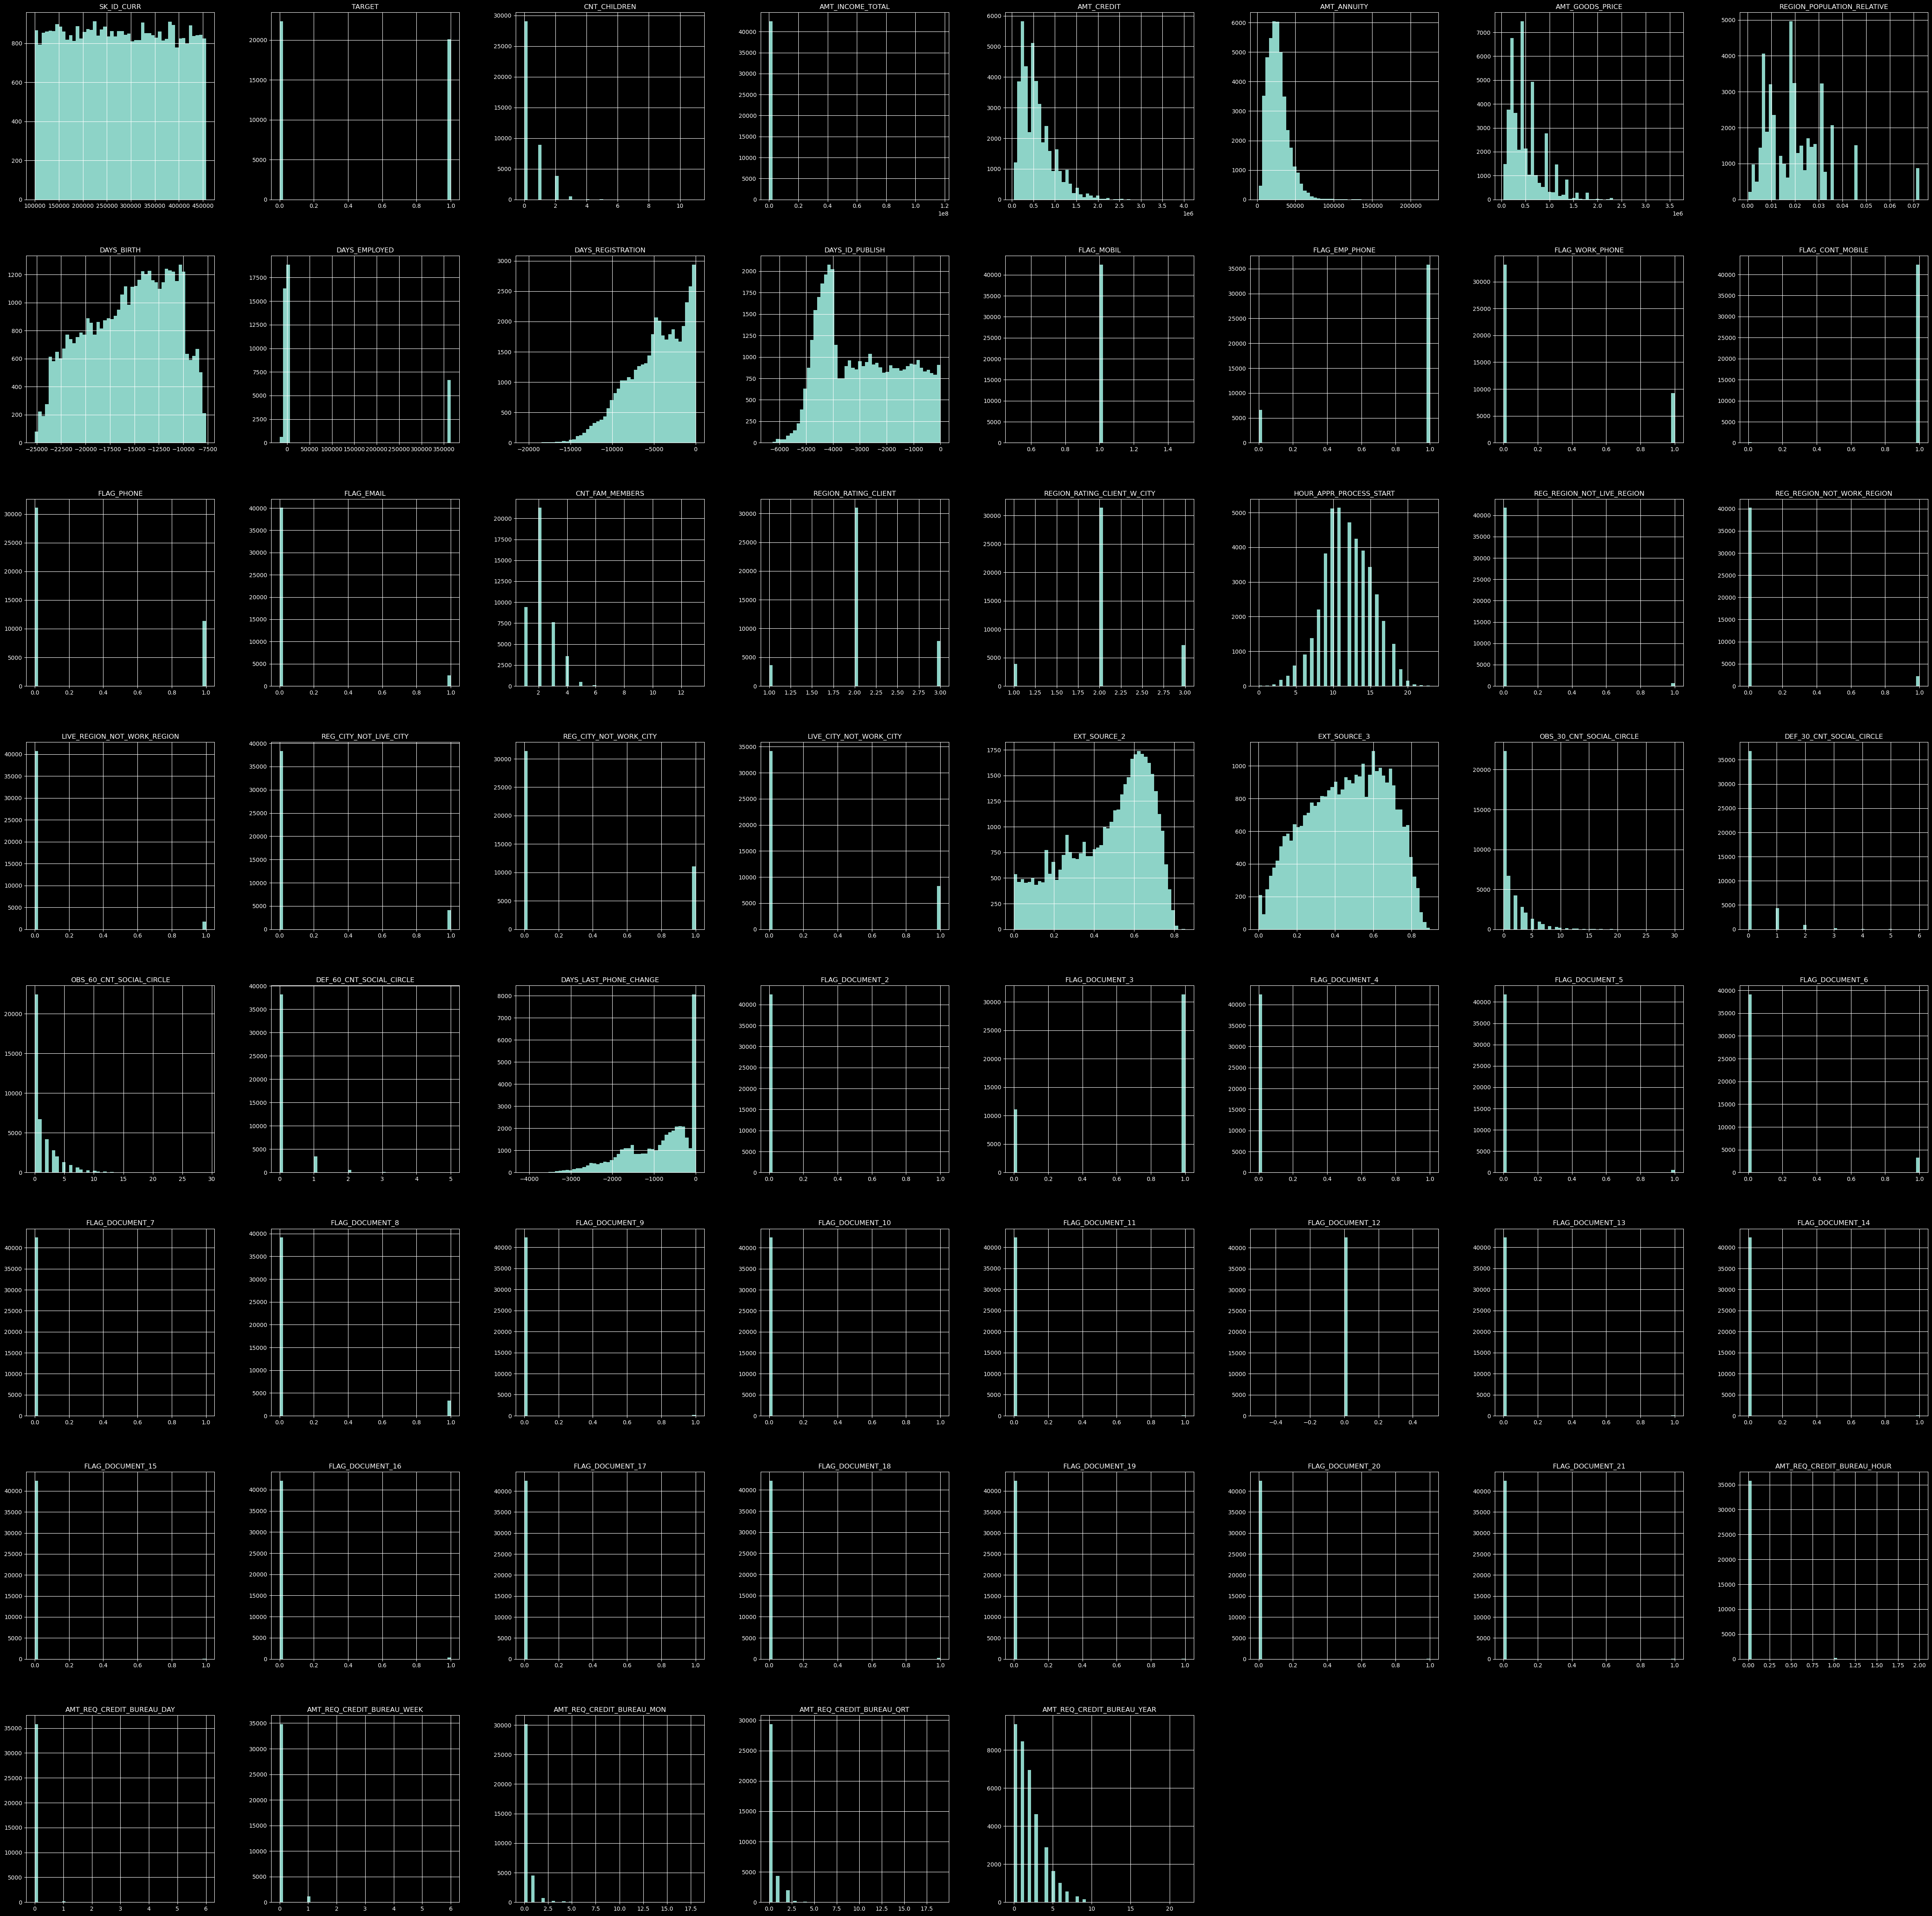

In [15]:
# plot histograms for each attribute in seaborn 

loan_data_training.hist(bins=50, figsize=(60,60))

In [16]:
# pairplot 

# sns.pairplot(loan_data_training)

In [17]:
# heatmap

# plt.figure(figsize=(60,60))
# sns.heatmap(loan_data_training.corr(), annot=True, cmap='coolwarm', linewidths=2)



C:\Users\Lihini Nisansala\AppData\Local\Temp\ipykernel_11844\4293334244.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data_training['DAYS_EMPLOYED'])


<Axes: >

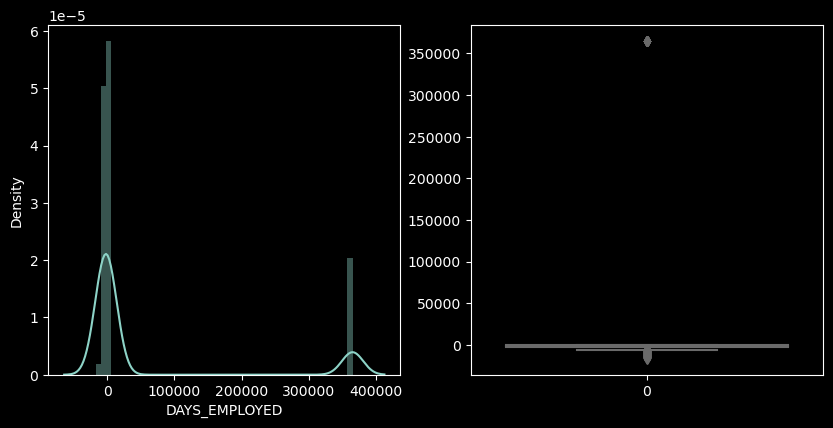

In [18]:
# histogram, boxplot for DAYS_EMPLOYED attribute

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)

sns.distplot(loan_data_training['DAYS_EMPLOYED'])

plt.subplot(2,2,2)

sns.boxplot(loan_data_training['DAYS_EMPLOYED'])

In [19]:
# check how many outliers in DAYS_EMPLOYED attribute

loan_data_training[loan_data_training['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].count()

6625

In [20]:
loan_data_training.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
3,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,-1038,1,1,0,1,0,0,1.0,2,2,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.432340,0.077499,0.0,0.0,0.0,0.0,-591,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


# Data Pre-processing and Transformation

In [21]:
# drop all the outliers in DAYS_EMPLOYED attribute from the dataset

loan_data_training = loan_data_training[loan_data_training['DAYS_EMPLOYED'] < 0]

In [22]:
loan_data_training.shape

(35826, 72)

In [23]:
# convert the NAME_CONTRACT_TYPE attribute into numerical

loan_data_training['NAME_CONTRACT_TYPE'] = loan_data_training['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})


In [24]:
# convert the CODE_GENDER,	FLAG_OWN_CAR,	FLAG_OWN_REALTY attributes in to numerical
def transform(self):
    self.CODE_GENDER = 1 if self.CODE_GENDER == 'M' else 0
    self.FLAG_OWN_CAR = 1 if self.FLAG_OWN_CAR == 'Y' else 0
    self.FLAG_OWN_REALTY = 1 if self.FLAG_OWN_REALTY == 'Y' else 0
    
    return self

loan_data_training = loan_data_training.apply(transform, axis=1)


In [25]:
# transform NAME_INCOME_TYPE,  NAME_FAMILY_STATUS, NAME_HOUSING_TYPEinto numerical 

loan_data_training['NAME_INCOME_TYPE'] = loan_data_training['NAME_INCOME_TYPE'].map({'Working': 0, 'Commercial associate': 1, 'Pensioner': 2, 'State servant': 3, 'Unemployed': 4, 'Student': 5, 'Businessman': 6, 'Maternity leave': 7})

loan_data_training['NAME_FAMILY_STATUS'] = loan_data_training['NAME_FAMILY_STATUS'].map({'Single / not married': 0, 'Married': 1, 'Civil marriage': 2, 'Widow': 3, 'Separated': 4})

loan_data_training['NAME_HOUSING_TYPE'] = loan_data_training['NAME_HOUSING_TYPE'].map({'House / apartment': 0, 'Rented apartment': 1, 'With parents': 2, 'Municipal apartment': 3, 'Office apartment': 4, 'Co-op apartment': 5})




In [26]:
# select 20 most important attributes
attributes = ['SK_ID_CURR',
                        'TARGET',
                        'NAME_CONTRACT_TYPE',
                        'CODE_GENDER',
                        'FLAG_OWN_CAR',
                        'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN',
                        'AMT_INCOME_TOTAL',	
                        'AMT_CREDIT',	
                        'AMT_ANNUITY',	
                        'AMT_GOODS_PRICE',	
                        # 'NAME_INCOME_TYPE',		
                        # 'NAME_FAMILY_STATUS',	
                        # 'NAME_HOUSING_TYPE',	
                        'DAYS_ID_PUBLISH',	
                        'DAYS_BIRTH',	
                        'DAYS_EMPLOYED',	
                        'CNT_FAM_MEMBERS',
                        'REGION_RATING_CLIENT_W_CITY',
                        'AMT_REQ_CREDIT_BUREAU_YEAR' ]

In [27]:
loan_data_training[attributes].head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,-2120,-9461,-637,1.0,2,1.0
1,100031,1,0,0,0,1,0,112500.0,979992.0,27076.5,702000.0,-1827,-18724,-2628,1.0,2,2.0
2,100047,1,0,1,0,1,0,202500.0,1193580.0,35028.0,855000.0,-1029,-17482,-1262,2.0,2,4.0
3,100049,1,0,0,0,0,0,135000.0,288873.0,16258.5,238500.0,-4409,-13384,-3597,2.0,3,2.0
4,100112,1,0,1,1,1,0,315000.0,953460.0,64107.0,900000.0,-1038,-10199,-2015,1.0,2,2.0
5,100130,1,0,0,0,1,1,157500.0,723996.0,30802.5,585000.0,-3190,-10526,-267,2.0,2,0.0
6,100160,1,0,1,0,1,0,292500.0,675000.0,36747.0,675000.0,-114,-16667,-200,2.0,2,0.0
7,100192,1,0,0,0,0,0,111915.0,225000.0,21037.5,225000.0,-646,-7989,-150,1.0,2,0.0
8,100209,1,1,1,0,1,3,180000.0,540000.0,27000.0,540000.0,-792,-15326,-1038,5.0,2,2.0
9,100214,1,0,0,0,1,1,202500.0,436032.0,28516.5,360000.0,-337,-10127,-111,3.0,1,NaN


In [28]:
features = loan_data_training[attributes]

In [29]:
features.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,-2120,-9461,-637,1.0,2,1.0
1,100031,1,0,0,0,1,0,112500.0,979992.0,27076.5,702000.0,-1827,-18724,-2628,1.0,2,2.0
2,100047,1,0,1,0,1,0,202500.0,1193580.0,35028.0,855000.0,-1029,-17482,-1262,2.0,2,4.0
3,100049,1,0,0,0,0,0,135000.0,288873.0,16258.5,238500.0,-4409,-13384,-3597,2.0,3,2.0
4,100112,1,0,1,1,1,0,315000.0,953460.0,64107.0,900000.0,-1038,-10199,-2015,1.0,2,2.0


In [30]:
# check for missing values in features

features.isnull().sum()[features.isnull().sum() > 0].sort_values(ascending=False).to_frame()

,0
AMT_REQ_CREDIT_BUREAU_YEAR,5429
AMT_GOODS_PRICE,41
AMT_ANNUITY,1
CNT_FAM_MEMBERS,1


In [31]:
# handle missing values

features['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(features['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)

features['AMT_GOODS_PRICE'].fillna(features['AMT_GOODS_PRICE'].mean(), inplace=True)

# drop AMT_ANNUITY, CNT_FAM_MEMBERS attributes' rows with missing values
features.dropna(subset = ['CNT_FAM_MEMBERS', 'AMT_ANNUITY'], axis = 0
                , inplace = True)
                

C:\Users\Lihini Nisansala\AppData\Local\Temp\ipykernel_11844\649386227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(features['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)
C:\Users\Lihini Nisansala\AppData\Local\Temp\ipykernel_11844\649386227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['AMT_GOODS_PRICE'].fillna(features['AMT_GOODS_PRICE'].mean(), inplace=True)
C:\Users\Lihini Nisansala\AppData\Local\Temp\ipykernel_11844\649386227.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [32]:
# cast CNT_FAM_MEMBERS and AMT_REQ_CREDIT_BUREAU_YEAR attributes data type into integer

features['CNT_FAM_MEMBERS'] = features['CNT_FAM_MEMBERS'].astype(int)
features['AMT_REQ_CREDIT_BUREAU_YEAR'] = features['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)



C:\Users\Lihini Nisansala\AppData\Local\Temp\ipykernel_11844\2684435035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['CNT_FAM_MEMBERS'] = features['CNT_FAM_MEMBERS'].astype(int)
C:\Users\Lihini Nisansala\AppData\Local\Temp\ipykernel_11844\2684435035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['AMT_REQ_CREDIT_BUREAU_YEAR'] = features['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)


In [33]:
features.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,-2120,-9461,-637,1,2,1
1,100031,1,0,0,0,1,0,112500.0,979992.0,27076.5,702000.0,-1827,-18724,-2628,1,2,2
2,100047,1,0,1,0,1,0,202500.0,1193580.0,35028.0,855000.0,-1029,-17482,-1262,2,2,4
3,100049,1,0,0,0,0,0,135000.0,288873.0,16258.5,238500.0,-4409,-13384,-3597,2,3,2
4,100112,1,0,1,1,1,0,315000.0,953460.0,64107.0,900000.0,-1038,-10199,-2015,1,2,2
5,100130,1,0,0,0,1,1,157500.0,723996.0,30802.5,585000.0,-3190,-10526,-267,2,2,0
6,100160,1,0,1,0,1,0,292500.0,675000.0,36747.0,675000.0,-114,-16667,-200,2,2,0
7,100192,1,0,0,0,0,0,111915.0,225000.0,21037.5,225000.0,-646,-7989,-150,1,2,0
8,100209,1,1,1,0,1,3,180000.0,540000.0,27000.0,540000.0,-792,-15326,-1038,5,2,2
9,100214,1,0,0,0,1,1,202500.0,436032.0,28516.5,360000.0,-337,-10127,-111,3,1,2


In [34]:
# get all the numerical attributes into a new data frame

numerical_features = loan_data_training.select_dtypes(include=['int64', 'float64'])

In [35]:
numerical_features.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0,0.0,0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100031,1,0,0,0,1,0,112500.0,979992.0,27076.5,702000.0,0,3.0,0,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,1.0,3,2,9,0,0,0,0,0,0,0.548477,0.190706,10.0,1.0,10.0,0.0,-161,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
2,100047,1,0,1,0,1,0,202500.0,1193580.0,35028.0,855000.0,1,1.0,0,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
3,100049,1,0,0,0,0,0,135000.0,288873.0,16258.5,238500.0,0,2.0,0,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,2.0,3,3,11,0,0,0,0,0,0,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4,100112,1,0,1,1,1,0,315000.0,953460.0,64107.0,900000.0,1,0.0,2,0.030755,-10199,-2015,-4802.0,-1038,1,1,0,1,0,0,1.0,2,2,13,0,0,0,0,1,1,0.432340,0.077499,0.0,0.0,0.0,0.0,-591,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [36]:
# check for missing values in numerical_features

numerical_features.isnull().sum()[numerical_features.isnull().sum() > 0].sort_values(ascending=False).to_frame()



,0
EXT_SOURCE_3,7566
AMT_REQ_CREDIT_BUREAU_HOUR,5429
AMT_REQ_CREDIT_BUREAU_DAY,5429
AMT_REQ_CREDIT_BUREAU_WEEK,5429
AMT_REQ_CREDIT_BUREAU_MON,5429
AMT_REQ_CREDIT_BUREAU_QRT,5429
AMT_REQ_CREDIT_BUREAU_YEAR,5429
OBS_30_CNT_SOCIAL_CIRCLE,87
DEF_30_CNT_SOCIAL_CIRCLE,87
OBS_60_CNT_SOCIAL_CIRCLE,87


In [37]:
# get the missing values records of AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR attributes each separately

AMT_REQ_CREDIT_BUREAU_HOUR_null = numerical_features[numerical_features['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull() == True]

AMT_REQ_CREDIT_BUREAU_DAY_null = numerical_features[numerical_features['AMT_REQ_CREDIT_BUREAU_DAY'].isnull() == True]

AMT_REQ_CREDIT_BUREAU_WEEK_null = numerical_features[numerical_features['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull() == True]

AMT_REQ_CREDIT_BUREAU_MON_null = numerical_features[numerical_features['AMT_REQ_CREDIT_BUREAU_MON'].isnull() == True]

AMT_REQ_CREDIT_BUREAU_QRT_null = numerical_features[numerical_features['AMT_REQ_CREDIT_BUREAU_QRT'].isnull() == True]

AMT_REQ_CREDIT_BUREAU_YEAR_null = numerical_features[numerical_features['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull() == True]


MemoryError: Unable to allocate 2.09 GiB for an array with shape (2, 140175230) and data type float64

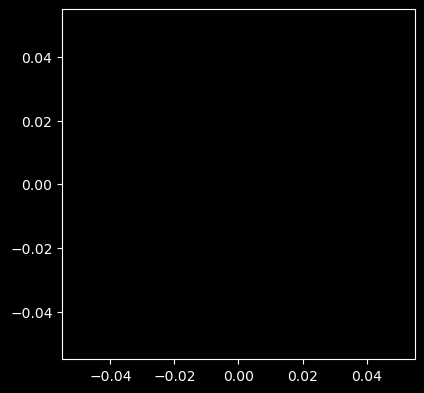

In [38]:
# plot histograms for each above

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)

sns.histplot(AMT_REQ_CREDIT_BUREAU_HOUR_null)


In [ ]:
# handle missing values 

numerical_features['EXT_SOURCE_2'].fillna(numerical_features['EXT_SOURCE_2'].mean(), inplace=True)

numerical_features['EXT_SOURCE_3'].fillna(numerical_features['EXT_SOURCE_3'].mean(), inplace=True)

numerical_features['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(numerical_features['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace=True)
numerical_features['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(numerical_features['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace=True)
numerical_features['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(numerical_features['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace=True)
numerical_features['AMT_REQ_CREDIT_BUREAU_MON'].fillna(numerical_features['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace=True)
numerical_features['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(numerical_features['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace=True)
numerical_features['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(numerical_features['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)



numerical_features['AMT_GOODS_PRICE'].fillna(numerical_features['AMT_GOODS_PRICE'].mean(), inplace=True)

# drop AMT_ANNUITY, CNT_FAM_MEMBERS attributes' rows with missing values
numerical_features.dropna(subset = ['CNT_FAM_MEMBERS', 'AMT_ANNUITY', 'NAME_FAMILY_STATUS'], axis = 0
                , inplace = True)



                

In [ ]:
# feature selection by information gain from numerical attributes

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Separate features (X) and the target variable (y)
X = numerical_features.drop(columns=['TARGET'])  # Replace 'target_column_name' with the name of the target variable
y = numerical_features['TARGET'] 

importances = mutual_info_classif(X, y)

feat_importances = pd.Series(importances, numerical_features.columns[1:])
feat_importances.plot(kind='barh', color='teal')
plt.show()


In [ ]:
# feature selection by information gain

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Separate features (X) and the target variable (y)
X = features.drop(columns=['TARGET'])  # Replace 'target_column_name' with the name of the target variable
y = features['TARGET'] 

importances = mutual_info_classif(X, y)

feat_importances = pd.Series(importances, features.columns[1:])
feat_importances.plot(kind='barh', color='teal')
plt.show()


In [ ]:
 # feature selection by correlation
correlations = X.corrwith(y)
correlations.plot(kind='barh', color='teal')
plt.show()


In [ ]:
# feature selection by random forest classifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc = RandomForestClassifier()
rfc.fit(X, y)

feat_importances = pd.Series(rfc.feature_importances_, loan_data_training.columns[1:])
feat_importances.plot(kind='barh', color='teal')

plt.title('Feature Importance from Random Forest Classifier')
plt.show()

In [ ]:
# feature selection by chi square test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=5)
selector.fit(X, y)

X_new = selector.transform(X)
X_new.shape

In [ ]:
# feature selection by lasso regression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))
sel_.fit(X, y)

sel_.get_support()

selected_feat = X.columns[(sel_.get_support())]

len(selected_feat)
print(selected_feat)

In [ ]:
# Target Attribute - TARGET
# classes = [0, 1]

# 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in the loan_data_training.csv
# 0 - all other cases

In [ ]:
# https://towardsdatascience.com/how-to-automatically-design-an-efficient-neural-network-ee842a631885

# https://scikit-learn.org/stable/user_guide.html

### fda_at3
Automatically search for the neural network

min - classification models [use all]

feature reduction through information gain

Canvas materials:

4.9 Different measures of performance <br/>
4.11 Examples and features of the ROC


The classification goal is to predict whether a client has loan repayment difficulties or not (target attribute: “TARGET“ {(binary: 0, 1)
<br/>
1--> client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample 

<br/>
0--> all other cases}. 